<a href="https://colab.research.google.com/github/nersi55/Repo/blob/main/Pedict_down_or_up_GPTNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data from the uploaded file
file_path = 'data-1.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into features (X) and target (y)
X = data.iloc[:, :9]
y = data['Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape


((198, 9), (198,), (50, 9), (50,))

#Build the Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

hist =model = Sequential([
    Dense(256, activation='relu', input_shape=(9,)),  # First hidden layer with 16 neurons
    Dense(196, activation='relu'),                     # Second hidden layer with 8 neurons
    Dense(160, activation='relu'),                     # Second hidden layer with 8 neurons
    Dense(128, activation='relu'),                     # Second hidden layer with 8 neurons
    Dense(64, activation='relu'),                     # Second hidden layer with 8 neurons
    Dense(32, activation='relu'),                     # Second hidden layer with 8 neurons
    Dense(16, activation='relu'),                     # Second hidden layer with 8 neurons

    Dense(1, activation='sigmoid')                   # Output layer with 1 neuron (sigmoid for binary classification)
])


#Compile the Model:

In [44]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


#Train the Model:

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


#Evaluate the Model:

In [46]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")



2/2 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.8400
Test Accuracy: 84.00%


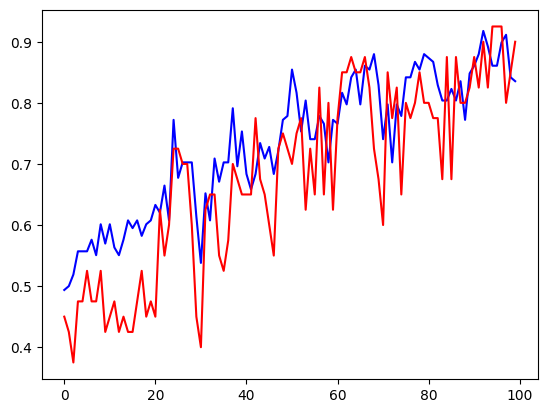

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')

